In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel(r'E:\Capstone project\Capstone Project Merged File\CapstoneProject_Football_Merged_Clean_data.xlsx')
df.head()

,game_id,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,Stadium_name,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,competition_id,date_id,players_id,Player_name,players_position
0,2222734,2012,19. Matchday,2,3,11,10,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,...,175,1000000,500000,2027-06-30,Prosport,RU1,2012-07-12,104203,Eugene Starikov,Attack
1,2598832,2015,9. Matchday,0,0,11,5,Oleksandr Babych,Vasyl Sachko,Stadion Chornomorets (2011),...,175,1000000,500000,2027-06-30,Prosport,UKR1,2012-03-11,104203,Eugene Starikov,Attack
2,2222798,2012,24. Matchday,1,1,4,11,Kurban Berdyev,Miodrag Bozovic,Central Stadium Kazan,...,175,1000000,500000,2027-06-30,Prosport,RU1,2012-03-11,104203,Eugene Starikov,Attack
3,2619433,2015,last 16 1st leg,0,1,9,9,Oleksandr Babych,Vasyl Sachko,Stadion Chornomorets (2011),...,175,1000000,500000,2027-06-30,Prosport,UKRP,2012-03-11,104203,Eugene Starikov,Attack
4,2598841,2015,10. Matchday,2,0,2,11,Mircea Lucescu,Oleksandr Babych,Arena Lviv,...,175,1000000,500000,2027-06-30,Prosport,UKR1,2015-03-10,104203,Eugene Starikov,Attack


In [3]:
df.isnull().sum()

game_id                        0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
Stadium_name                   0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
minute                         0
game_event_type                0
player_in_id                   0
appearance_id                  0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
players_last_season            0
current_club_id                0
players_birth_country          0
date_of_birth                  0
sub_positi

In [4]:
df.dtypes

game_id                                 int64
season                                  int64
round                                  object
home_club_goals                         int64
away_club_goals                         int64
home_club_position                      int64
away_club_position                      int64
home_club_manager_name                 object
away_club_manager_name                 object
Stadium_name                           object
attendance                              int64
referee                                object
home_club_name                         object
away_club_name                         object
aggregate                              object
competition_type                       object
game_event_id                          object
minute                                  int64
game_event_type                        object
player_in_id                            int64
appearance_id                          object
yellow_cards                      

In [5]:
df.shape

(4742, 42)

# FOCUS AREA 1

# Performance Analysis

# Objective 1:

Evaluate and analyse the performance of the players based on the goals scored, assists and maintaining discipline.

Top 10 Goal Scorers

Player_name
Aron Johannsson      128
Jozy Altidore         73
Christian Pulisic     47
Fabian Johnson        31
Bobby Wood            27
Clint Dempsey         21
Emmanuel Sabbi        19
Timothy Chandler      17
Kenny Saief           14
Sacha Kljestan        14
Name: goals, dtype: int64


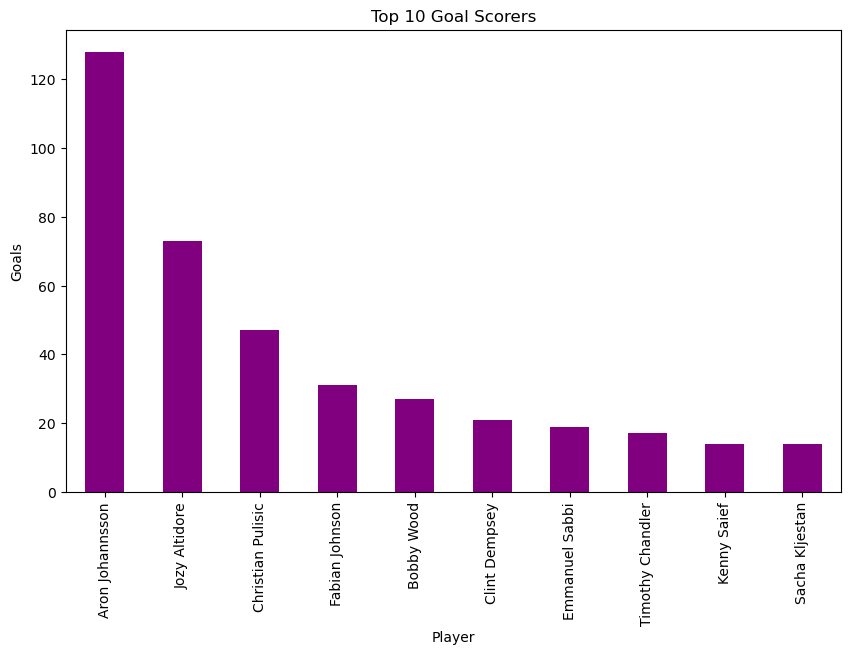

In [6]:
top_scorers = df.groupby('Player_name')['goals'].sum().sort_values(ascending=False).head(10)
print(top_scorers)

plt.figure(figsize=(10, 6))
top_scorers.plot(kind='bar', color='purple')
plt.title('Top 10 Goal Scorers')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.show()


Interpretation: The highest Goal scorer is Aron Johannsson with a total of 128 goal from all the matches he played, followed by Jozy Altidore and  Christian Pulisic with 73 and 47 goals.

Top 10 Assists

Player_name
Christian Pulisic    33
Fabian Johnson       29
Aron Johannsson      20
Timothy Chandler     18
Jozy Altidore        17
Sacha Kljestan       13
Kenny Saief          11
Clint Dempsey         9
Jermaine Jones        8
Jordan                7
Name: assists, dtype: int64


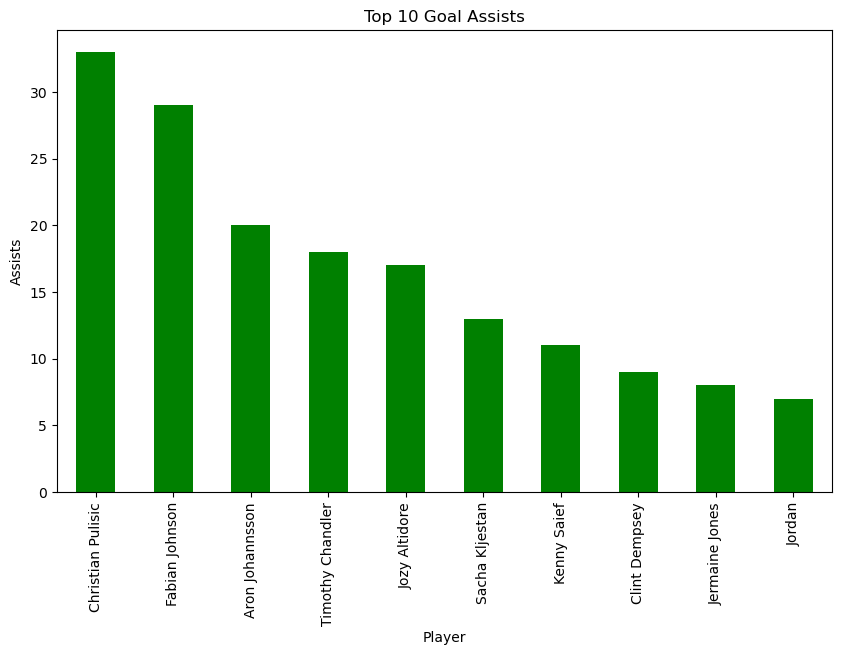

In [7]:
top_assists = df.groupby('Player_name')['assists'].sum().sort_values(ascending=False).head(10)
print(top_assists)

plt.figure(figsize=(10, 6))
top_assists.plot(kind='bar', color='green')
plt.title('Top 10 Goal Assists')
plt.xlabel('Player')
plt.ylabel('Assists')
plt.show()

Interpretation: The player with the highest assists is Christian Pulisic with 33 assists in total. Followed by Fabian Johnson with 29 assists and Aron Johannson with 20 assists.

Top 10 least Disciplined Players

                     yellow_cards  red_cards
Player_name                                 
Timothy Chandler               39          1
John Anthony Brooks            39          0
Alfredo Morales                31          0
Jermaine Jones                 29          1
Geoff Cameron                  21          2
Weston McKennie                20          0
Aron Johannsson                18          1
Jozy Altidore                  17          0
DeAndre Yedlin                 16          1
Danny Williams                 16          0


<Figure size 800x600 with 0 Axes>

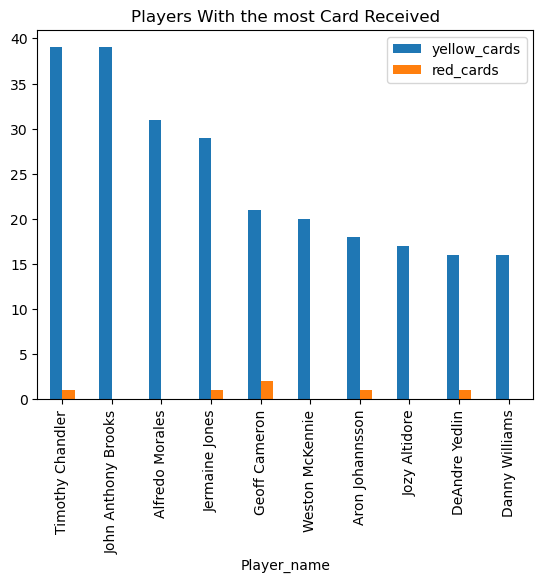

In [8]:
least_discipline = df.groupby('Player_name')[['yellow_cards', 'red_cards']].sum().sort_values(by=['yellow_cards', 'red_cards'], ascending=False).head(10)

print(least_discipline)

plt.figure(figsize = (8,6))
least_discipline.plot(kind = 'bar')
plt.title("Players With the most Card Received")
plt.show()

Interpretation: These are the least-disciplined players. Timothy Chandler and John Anthony Brooks received the highest number of yellow cards however, John did not receive any red cards which makes Timothy the most cards received player.

# Business Question 1:

How do individual player performances, as measured by goals, assists, and disciplinary records, correlate with the overall success of their teams in the league?

- Players who contribute heavily in terms of goals and assists are crucial for their team's success in the league. Players like Aron Johannsson and Christian Pulisic, who excel in both scoring and assisting can help their team to get better positions in the league.

# Objective 2:

Analyse and compare the performance of the top 10 teams in terms of goals scored at home matches and away matches and also assess team consistency and performance levels on their average league position and goal metrics.

Top 10 Teams with highest goals in Home as well as in away position.

In [10]:
home_goals = df.groupby('home_club_name')['home_club_goals'].sum().reset_index()
away_goals = df.groupby('away_club_name')['away_club_goals'].sum().reset_index()

home_goals.columns = ['Team', 'Home Goals']
away_goals.columns = ['Team', 'Away Goals']

goal_analysis = pd.merge(home_goals, away_goals, on='Team', how='inner')

top_home_goals = goal_analysis.sort_values(by='Home Goals', ascending=False).head(10)

print("Top 10 Teams by Home Goals:")
print(top_home_goals)


Top 10 Teams by Home Goals:
                                   Team  Home Goals  Away Goals
29                    Borussia Dortmund         319         226
13                   Alkmaar Zaanstreek         251         159
121                       Not_Available         186          56
51                Everton Football Club         178         118
60                        FC Schalke 04         164         175
173                          Stoke City         134          85
148      Royal Sporting Club Anderlecht         127         109
179     Tottenham Hotspur Football Club         123         114
169  Sportverein Werder Bremen von 1899         109         130
89                           Hertha BSC         108         123


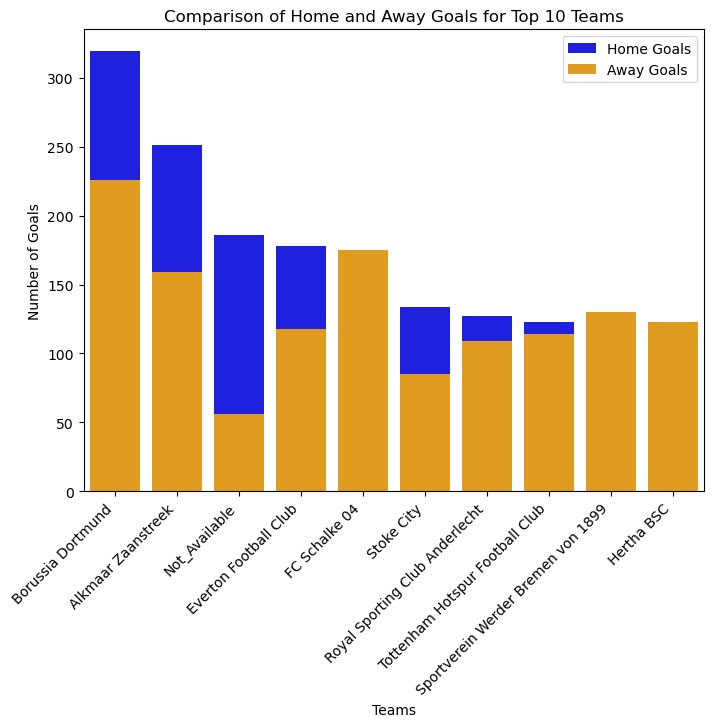

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x="Team", y="Home Goals", data=top_home_goals, color="blue", label="Home Goals")
sns.barplot(x="Team", y="Away Goals", data=top_home_goals, color="orange", label="Away Goals")
plt.title("Comparison of Home and Away Goals for Top 10 Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Goals")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right")
plt.show()

Interpretation: The Borussia Dortmund Team has had the highest goals scored both in the home matches as well as the away matches. However, when compared between their home and away matches, this team seemed to have scored more when they played at home matches, and this same goes for the team Alkmaar Zaanstreek, Everton Football Club, Stoke City, Royal Sporting Club Anderlecht and Tottenham Hotspur Football Club. Whereas, Team FC Schalke 04, Sportverein Werder Bremen von 1899 and Hertha BSC, they seemed to have more goals at their away matches.

In [11]:
home_positions = df.groupby('home_club_name')['home_club_position'].mean().reset_index()
home_positions.columns = ['Team', 'Average Home Position']

away_positions = df.groupby('away_club_name')['away_club_position'].mean().reset_index()
away_positions.columns = ['Team', 'Average Away Position']

avg_position = pd.merge(home_positions, away_positions, on='Team')
avg_position['Average Position'] = (avg_position['Average Home Position'] + avg_position['Average Away Position']) / 2

avg_position = avg_position[['Team', 'Average Position']]

performance_analysis = pd.merge(goal_analysis, avg_position, on='Team').head(10)

performance_analysis = performance_analysis.sort_values(by='Average Position')

print(performance_analysis)


                          Team  Home Goals  Away Goals  Average Position
7           AFC Ajax Amsterdam          83          64          4.518627
5                   AC Horsens          35          38          8.580357
0        1. FC Heidenheim 1846           2           1          9.000000
8  AO FK Zenit Sankt-Peterburg           9           1          9.000000
9        APS Atromitos Athinon           2           2          9.000000
2              1. FSV Mainz 05          44          28         10.655556
1           1. FC Union Berlin           7          10         11.562500
6                 ADO Den Haag          13           4         12.180556
3               1.FC Nuremberg          68          35         13.819048
4                   AC Ajaccio           0           2         18.500000


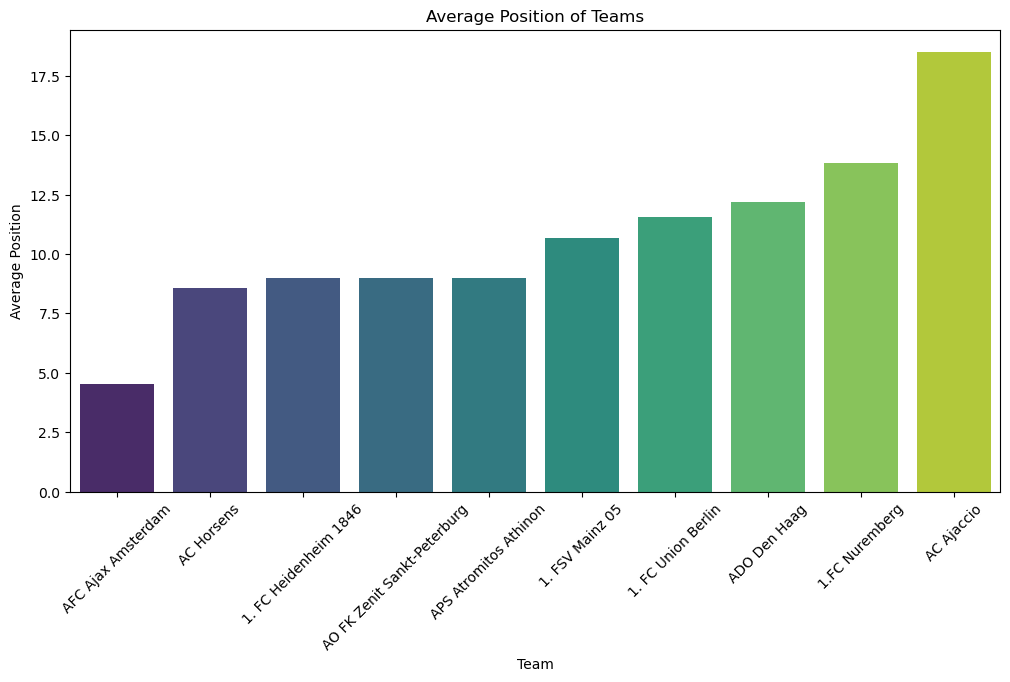

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Average Position', data=performance_analysis, palette="viridis")

plt.xlabel('Team')
plt.ylabel('Average Position')
plt.title('Average Position of Teams')
plt.xticks(rotation=45)

plt.show()

Interpretation: From this result, its clear that AFC Ajax Amsterdam is the dominant team as they have the most home matches goals as well as away matches goals, and having the best average position of 4.5. Whereas,  AC Ajaccio has been the worst performing team, with an average position of 18.5 and a very low count of goals 0 at home matches and 2 goals at away. Aside from the Best and Worst, there are teams with a balanced goal scorings and average position such as AC Horsens with 35 goals at home matches and 38 at away, and there average position with 8.5, indicating a consistency across both home and away macthes.

# Business Question 2:

What patterns or trends can be identified in the home and away goal-scoring performance of the top 10 teams, and how does this correlate with their consistency and average league position over the season?

- The teams that perform well in both home and away macthes is likely to secure better position. Teams like  AFC Ajax Amsterdam which have high number of goals at both home and away matches tend to maintain top positions in the league. Whereas, those teams with low goals scored at both the macthes tends to struggle to achieve better positions.

# Focus Area 2

# Players Profile and Market Value

# Objective 1:

Analyze the distribution of player attributes such as naitonality, age, dominant foot, and position to ensure a balanced squad composition.

In [13]:
np.size((df['players_birth_country'].unique()))

11

players_birth_country
United States    3694
Germany           853
Italy              70
England            40
Netherlands        39
UdSSR              22
Colombia           15
Ethiopia            5
Ireland             2
Nigeria             1
Norway              1
dtype: int64


<Axes: xlabel='players_birth_country', ylabel='Count of Country'>

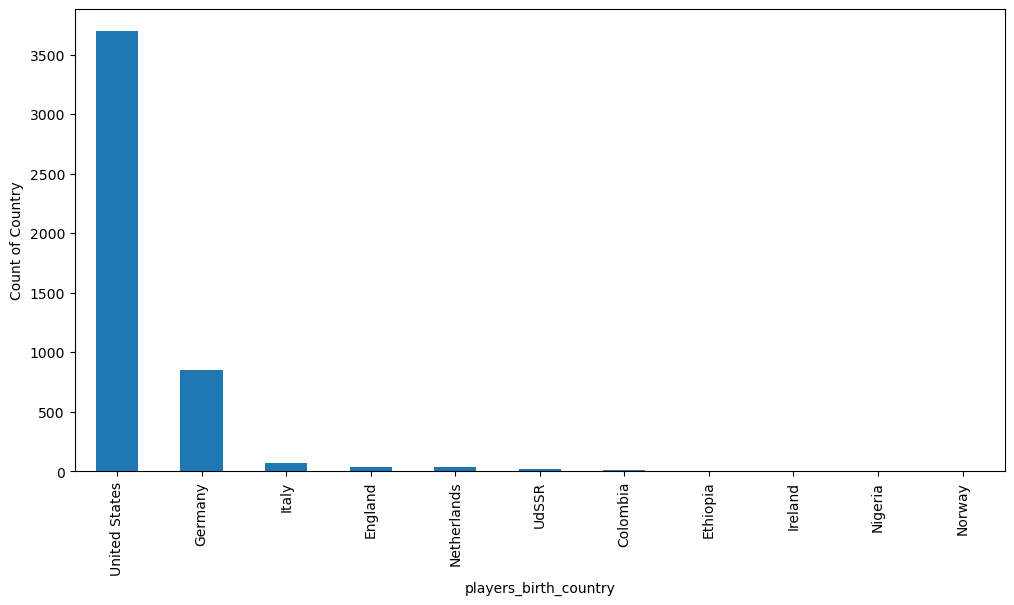

In [14]:
nationality = df.groupby('players_birth_country').size().sort_values(ascending = False)
print(nationality)
nationality.plot(kind = 'bar', figsize = (12,6), ylabel = 'Count of Country')


Interpretation: The chart clearly displays that Majority of the players are from the United States. While other countries have only few number of players.

In [49]:
# Displaying the distribution of age

In [15]:
df['age'] = pd.to_datetime('today').year - df['date_of_birth'].dt.year

In [16]:
df['age'].max()

53

In [17]:
df['age'].min()

20

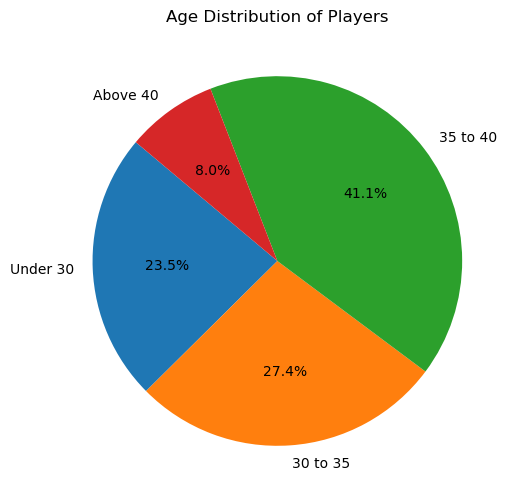

In [18]:
age_groups = {
    'Under 30': len(df[df['age'] <= 30]),
    '30 to 35': len(df[(df['age'] > 30) & (df['age'] <= 35)]),
    '35 to 40': len(df[(df['age'] > 35) & (df['age'] <= 40)]),
    'Above 40': len(df[df['age'] > 40])
}

plt.figure(figsize=(8,6))
plt.pie(age_groups.values(), labels=age_groups.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution of Players')
plt.show()

Interpretation: The largest proportion of players, accounting for 41.1%, falls within the 35 to 40 age range. Following this, 27.4% of players are aged between 30 to 35. Those under 30 make up 23.5% of the total, while the smallest group, comprising 8.0% of players, is aged above 40. The chart indicates that the majority of players are within their mid to late thirties, suggesting an aging population in the dataset, with fewer younger or older players.

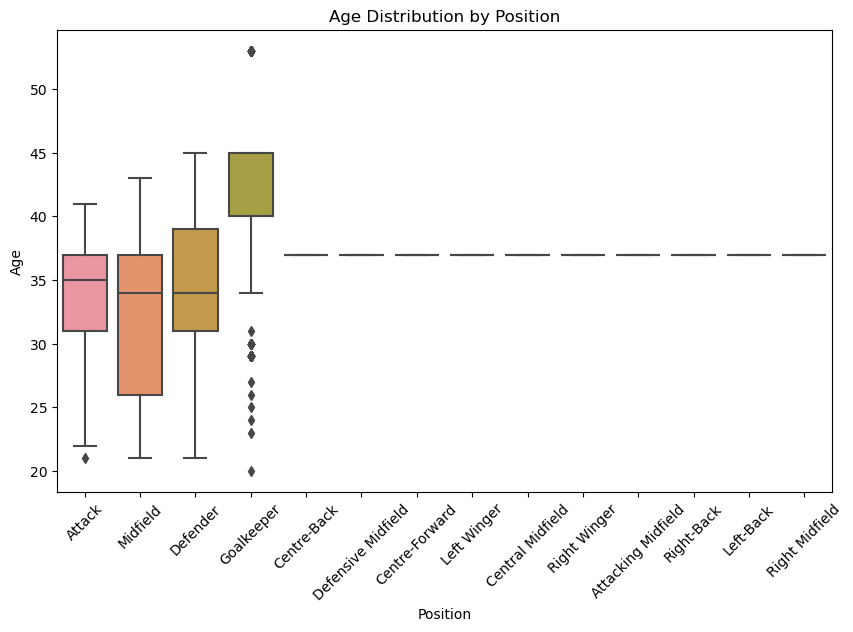

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='players_position', y='age', data=df)
plt.title('Age Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

Interpretation: The Age distribution in the attack, midfield and defender position is younger as compared to the goal keeper position. this suggest that players who are older and have more experienced tend to occupy goalkeeper position, while younger players are commonly found in the attack, midfield and defender position. This could mean that younger players might have the advantage in those positions because of the physical and speed requirements.

In [50]:
# Displaying the distribution of Footedness by Position

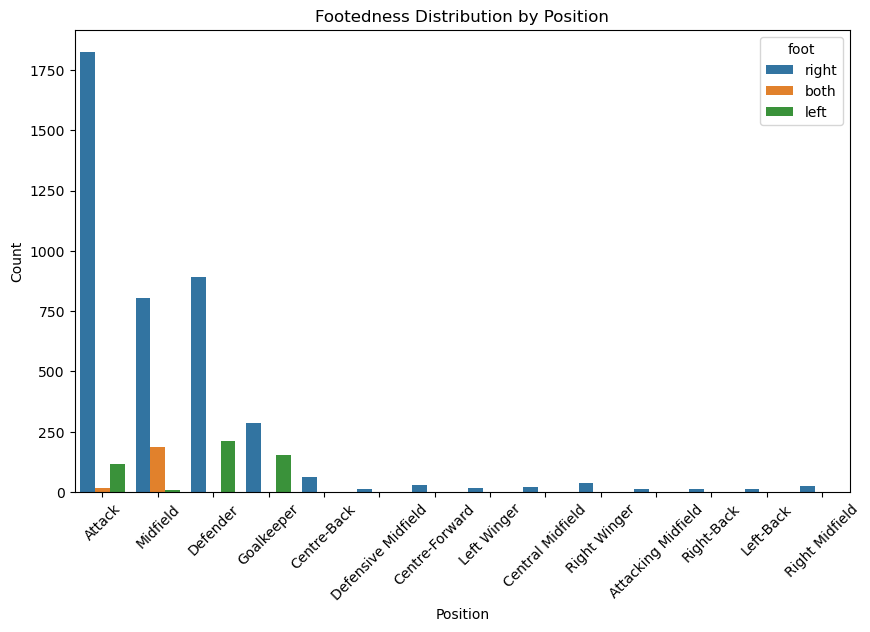

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='players_position', hue='foot', data=df)
plt.title('Footedness Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Interpretation: The charts shows a dominacne of right footed players across all positions particularly in Attack, Midfield and defender positions, where the count is significantly higher than those players who are left-footed or who are both rigth and left footed. Among these, Attack Position have the highest count of right_footed players followed by Midfield and Defenders. There are also few players who are right and left_footed in the Midfield Position indicating versatility.

# Business Question 1:

How does the age distribution and physical attribute such as footedness of the players impact positional deployment and overall team balance?

- The age distribution shows that younger players tend to fill attack, midfield, and defensive roles and  older, more experienced players often occupy the goalkeeper position, This distribution ensures that teams maintain high energy levels in physically demanding roles while relying on experienced goalkeepers for stability. Footedness also impacts team balance, with a dominance of right-footed players across all positions.

# Objective 2:

Analyse the players' market value trends, highest market values, and contract expiration dates to strategically time player transfers.

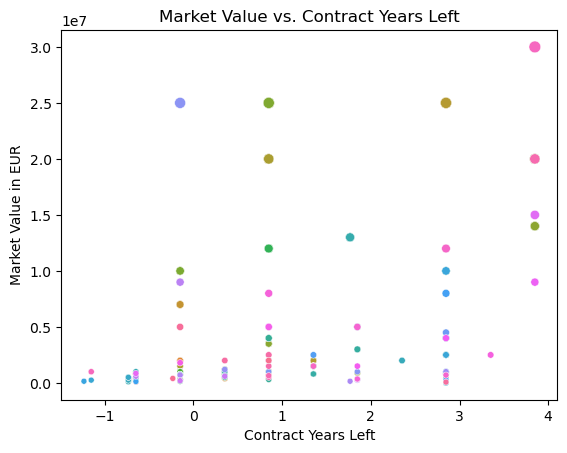

In [21]:
# Displaying Market Value vs COntract Years left
df['contract_years_left'] = (df['contract_expiration_date'] - pd.to_datetime('today')).dt.days / 365.25

sns.scatterplot(x='contract_years_left', y='market_value_in_eur', data=df, hue='Player_name', size='market_value_in_eur', legend=False)
plt.title('Market Value vs. Contract Years Left')
plt.xlabel('Contract Years Left')
plt.ylabel('Market Value in EUR')
plt.show()

Interpretation: The chart suggests that players with fewer years left on their contracts tend to have lower market values, while players with more years remaining have a wider range of market values. This indicates that players with longer contracts generally maintain or increase their market value, making them more valuable assets for the club.

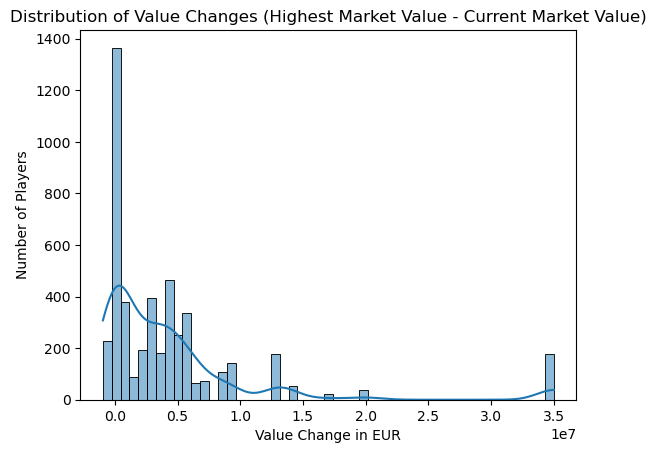

In [22]:
# Displaying The Distribution of Market Value Changes
df['value_change'] = df['highest_market_value_in_eur'] - df['market_value_in_eur']
sns.histplot(df['value_change'], kde=True)
plt.title('Distribution of Value Changes (Highest Market Value - Current Market Value)')
plt.xlabel('Value Change in EUR')
plt.ylabel('Number of Players')
plt.show()


Interpretation: A large number of players has minimal value change, indicating that their current market value is close to their highest value. However, there are also smaller groups of players with larger value decreases.

# Business Question 2:

How does the remaining duration of a player's contract impact their current market value, and which players nearing contract expiration are undervalued or overvalued?

- Players with longer contracts tend to maintain or increase their market value, making them more valuable assets. On the other hand, players with fewer years left on their contracts generally have lower market values. The analysis suggests that most players' current market values are close to their peak, but some are significantly undervalued as their contracts are near expiration. These players might be at risk of losing value and could be considered for strategic transfers.

# Focus Area 3

# Team Comparison

# Objective 1:

Analyze the Impact of Managerial Strategies on Team Performance and the Comparison of Goals.

In [23]:
manager_performance = df.groupby(['home_club_manager_name']).agg({
    'home_club_goals': 'mean',
    'away_club_goals': 'mean',
    'home_club_position': 'mean'
}).reset_index()
manager_performance.sort_values('home_club_position').head(10)

,home_club_manager_name,home_club_goals,away_club_goals,home_club_position
396,Not_Available,0.002130,0.025559,0.057508
475,Ronny Deila,3.000000,1.000000,1.000000
135,Ernesto Valverde,3.000000,0.000000,1.000000
5,Adolfo Sormani,3.000000,1.000000,1.000000
339,Mark van Bommel,2.666667,0.333333,1.333333
493,Senol Can,2.500000,0.000000,1.500000
501,Stale Solbakken,2.666667,0.777778,1.666667
465,Roberto Mancini,2.600000,0.600000,1.800000
364,Michel Jansen,2.000000,1.000000,2.000000
286,Kenneth Andersen,1.000000,1.000000,2.000000


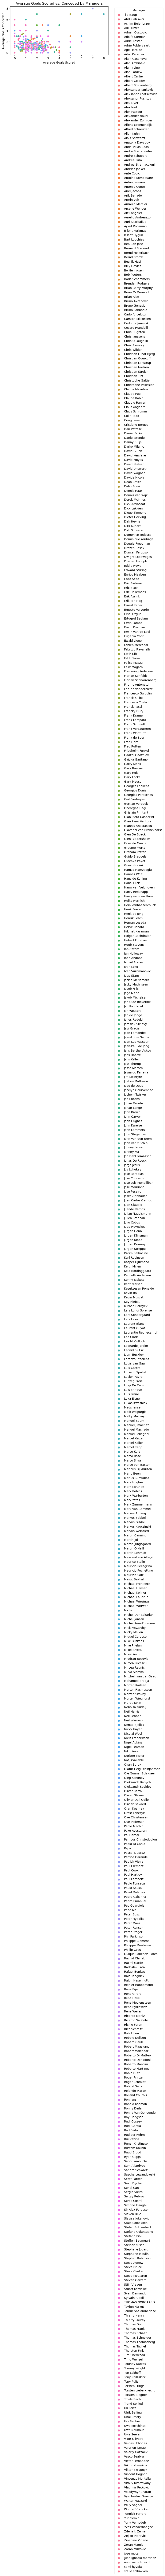

In [24]:
plt.figure(figsize=(6, 3))
sns.scatterplot(data=manager_performance, x='home_club_goals', y='away_club_goals', hue='home_club_manager_name')
plt.title('Average Goals Scored vs. Conceded by Managers')
plt.xlabel('Average Goals Scored')
plt.ylabel('Average Goals Conceded')
plt.legend(title='Manager', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Interpretation: The majority of the managers are clustered in the lower left side of the plot. This suggests that most managers lead teams that both score and concede relatively few goals. There are only a few managers whose teams both score and concede more than 4 goals on average. This suggests that most managers tend to focus on balanced or slightly defensive strategies, aiming to minimize goals conceded while maintaining modest goal-scoring performance.

In [25]:
team_goals_home = df.groupby('home_club_name')['home_club_goals'].sum().reset_index()
team_goals_home.columns = ['Team', 'Total_Goals']

team_goals_away = df.groupby('away_club_name')['away_club_goals'].sum().reset_index()
team_goals_away.columns = ['Team', 'Total_Goals']

total_goals = pd.concat([team_goals_home, team_goals_away]).groupby('Team').sum().reset_index()

top_teams = total_goals.sort_values(by='Total_Goals', ascending=False).head(10)

print(top_teams)

                                          Team  Total_Goals
46                           Borussia Dortmund          545
22                          Alkmaar Zaanstreek          410
96                               FC Schalke 04          339
84                       Everton Football Club          296
183                              Not_Available          242
253         Sportverein Werder Bremen von 1899          239
267            Tottenham Hotspur Football Club          237
221             Royal Sporting Club Anderlecht          236
141                                 Hertha BSC          231
47   Borussia Verein f r Leibes bung 1900 e.V.          224


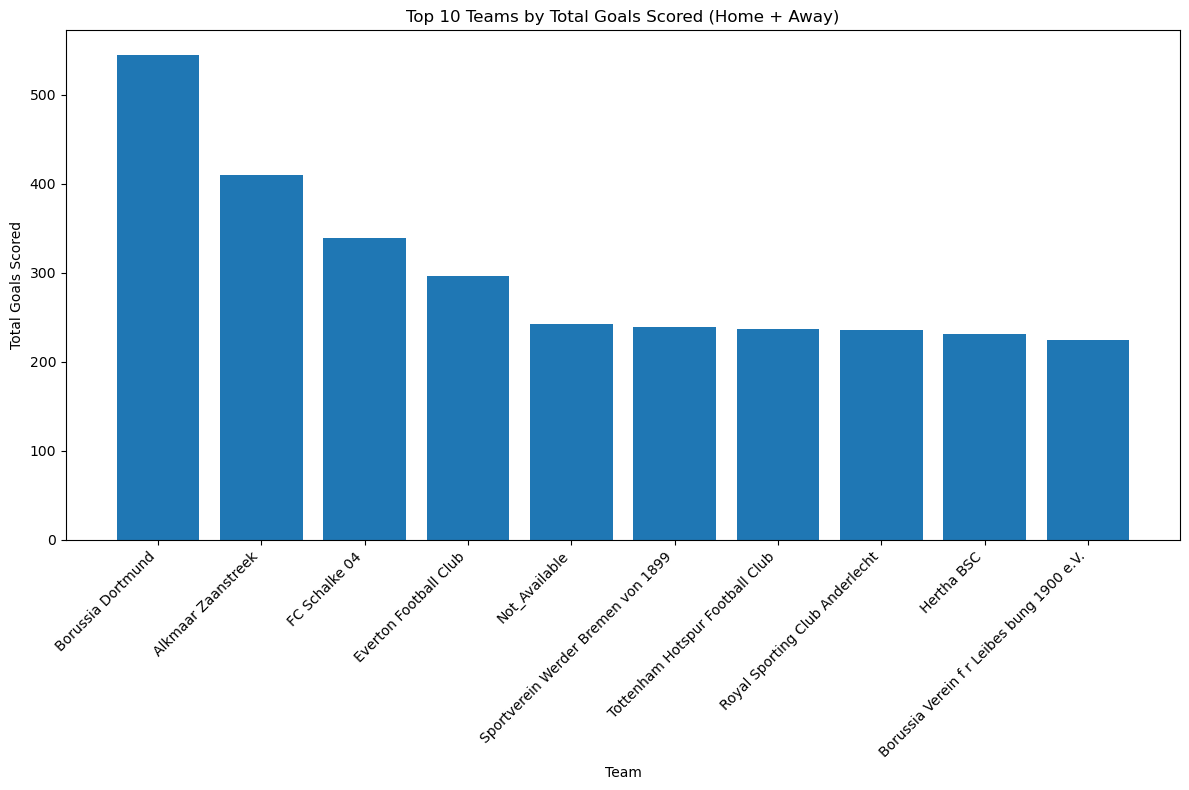

In [26]:
plt.figure(figsize=(12, 8))
plt.bar(top_teams['Team'], top_teams['Total_Goals'])
plt.xlabel('Team')
plt.ylabel('Total Goals Scored')
plt.title('Top 10 Teams by Total Goals Scored (Home + Away)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation: The team with the highest goals in total is Borussia Dortmund with 545 goals, followed by Alkmaar Zaanstreek and FC Schalke 04 with 410 and 339 respectively.

# Business Question 1:

Which football teams are the most effective in terms of scoring goals, and how does the goal-scoring performance vary under different managers?


- Borussia Dortmund stands out as the most effective team in terms of goal-scoring, with 545 total goals. The Goals scored are relatively low under majority of the managers. This suggests that most managers tend to focus on balanced or slightly defensive strategies, aiming to minimize goals conceded while maintaining modest goal-scoring performance.

# Objective 2:

Compare Team Strategies by Analyzing the Distribution and Impact of Player Positions on Team Success

In [27]:
df['home_club_name'].replace("Not_Available", np.nan, inplace=True)

df['home_club_name'] = df['home_club_name'].fillna(df['home_club_name'].mode()[0])

team_goals = df.groupby('home_club_name')['home_club_goals'].sum().sort_values(ascending=False)

top_10_teams = team_goals.head(10).index.tolist()

top_10_df = df[df['home_club_name'].isin(top_10_teams)]



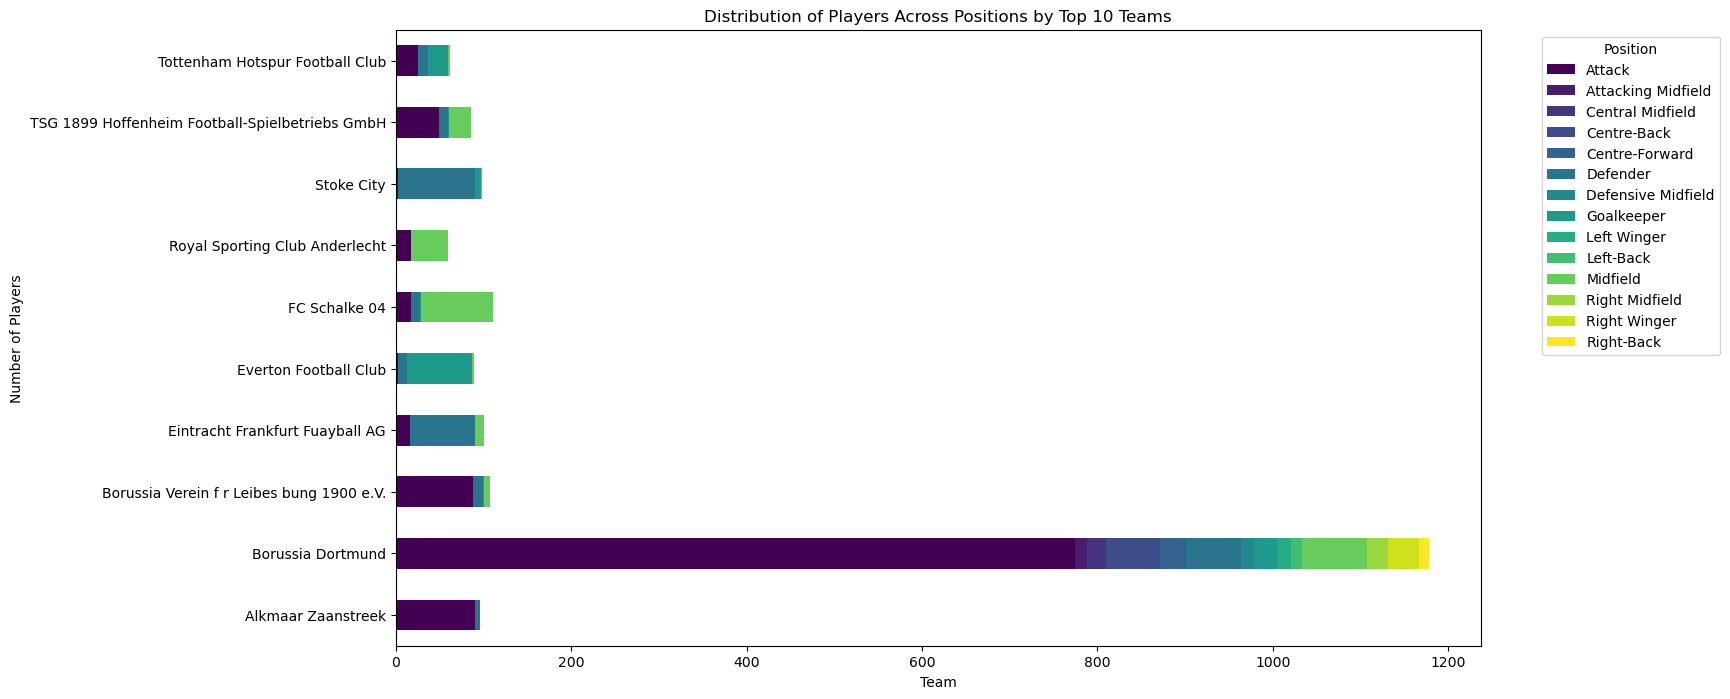

In [28]:
top_10_position_distribution = top_10_df.groupby(['home_club_name', 'players_position']).size().unstack(fill_value=0)


top_10_position_distribution.plot(kind='barh', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Distribution of Players Across Positions by Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Number of Players')

plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretation: Borussia Dortmund has the highest number of players, with a noticeable concentration in the Attacking Midfield position, as indicated by the purple color. In contrast, the other teams have fewer players overall, with a more balanced distribution across various positions. 


<Figure size 1400x800 with 0 Axes>

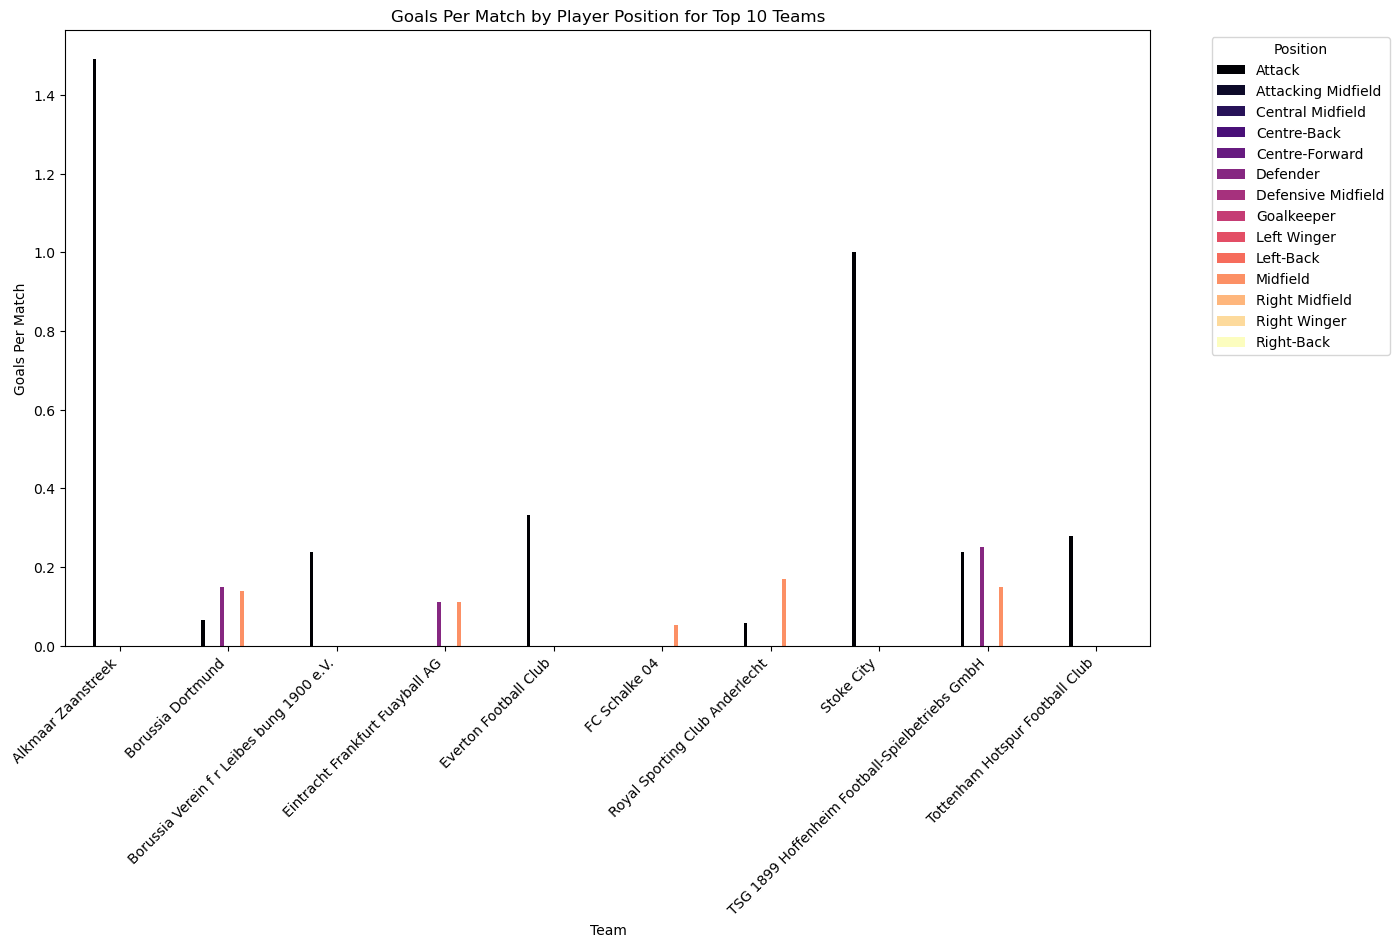

In [29]:
top_10_position_goals = top_10_df.groupby(['home_club_name', 'players_position']).agg(
    total_goals=('goals', 'sum'),
    matches_played=('game_id', 'nunique')
).reset_index()

top_10_position_goals['goals_per_match'] = top_10_position_goals['total_goals'] / top_10_position_goals['matches_played']

goals_by_position_top_10 = top_10_position_goals.pivot(index='home_club_name', columns='players_position', values='goals_per_match')

plt.figure(figsize=(14, 8))
goals_by_position_top_10.plot(kind='bar', colormap='magma', figsize=(14, 8))
plt.title('Goals Per Match by Player Position for Top 10 Teams')
plt.xlabel('Team')
plt.ylabel('Goals Per Match')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Interpretation: This chart shows that players in the Attack position tend to score the highest goals per match. Alkmaar Zaanstreek stands out with a player who has an exceptionally high goal-scoring rate, far surpassing players from other teams. Stoke City also has high-scoring players in the Attack position, though their rate is lower than Alkmaar Zaanstreek. Despite Borussia Dortmund having a large number of players, their goals-per-match ratio is much lower across different positions

# Business Question 2:

How does the distribution of players across positions, particularly in attacking roles, impact a team's goal-scoring performance, and what can be learned from teams like Borussia Dortmund, Alkmaar Zaanstreek, and Stoke City?

- Despite Borussia Dortmund having many players, their goal-scoring rate is lower, suggesting that more attackers don't guarantee better performance. In contrast, Alkmaar Zaanstreek focuses on fewer but highly efficient attackers, resulting in a higher goal-scoring rate. Quality over quantity in attacking roles is key to better team performance.

# Focus Area 4:

# Attendance and Stadium Analysis

# Objective 1:

Assess the Impact of Stadium Characteristics on Match Attendance:

                  Stadium_name    attendance
208               Old Trafford  75133.714286
241          SIGNAL IDUNA PARK  74941.282051
244          Santiago Bernabeu  67739.000000
11               Allianz Arena  66500.375000
257           Spotify Camp Nou  61768.500000
53       Civitas Metropolitano  61023.000000
86            Emirates Stadium  59856.760000
325  Tottenham Hotspur Stadium  58308.000000
338              Veltins-Arena  57326.513514
349            Wembley Stadium  55472.555556


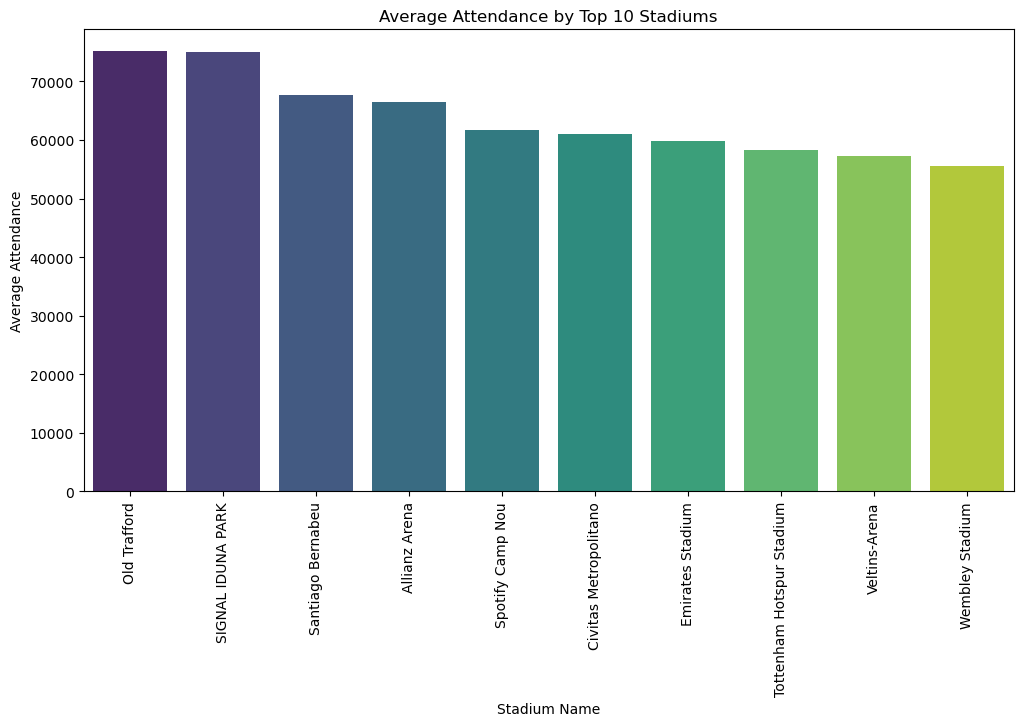

In [30]:
stadium_attendance = df.groupby('Stadium_name')['attendance'].mean().reset_index()

top_10_stadiums = stadium_attendance.sort_values(by='attendance', ascending=False).head(10)
print(top_10_stadiums)

top_10_df = df[df['Stadium_name'].isin(top_10_stadiums['Stadium_name'])]


plt.figure(figsize=(12, 6))
sns.barplot(x='Stadium_name', y='attendance', data=top_10_stadiums, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Attendance by Top 10 Stadiums')
plt.xlabel('Stadium Name')
plt.ylabel('Average Attendance')
plt.show()


Interpretation: Old Trafford has the highest average attendance with approximately 75,133, followed closely by SIGNAL IDUNA PARK with around 74,941. The lowest average attendance is at Wembley Stadium, with approximately 55,472. This suggests that stadiums with higher attendance likely have larger capacities.

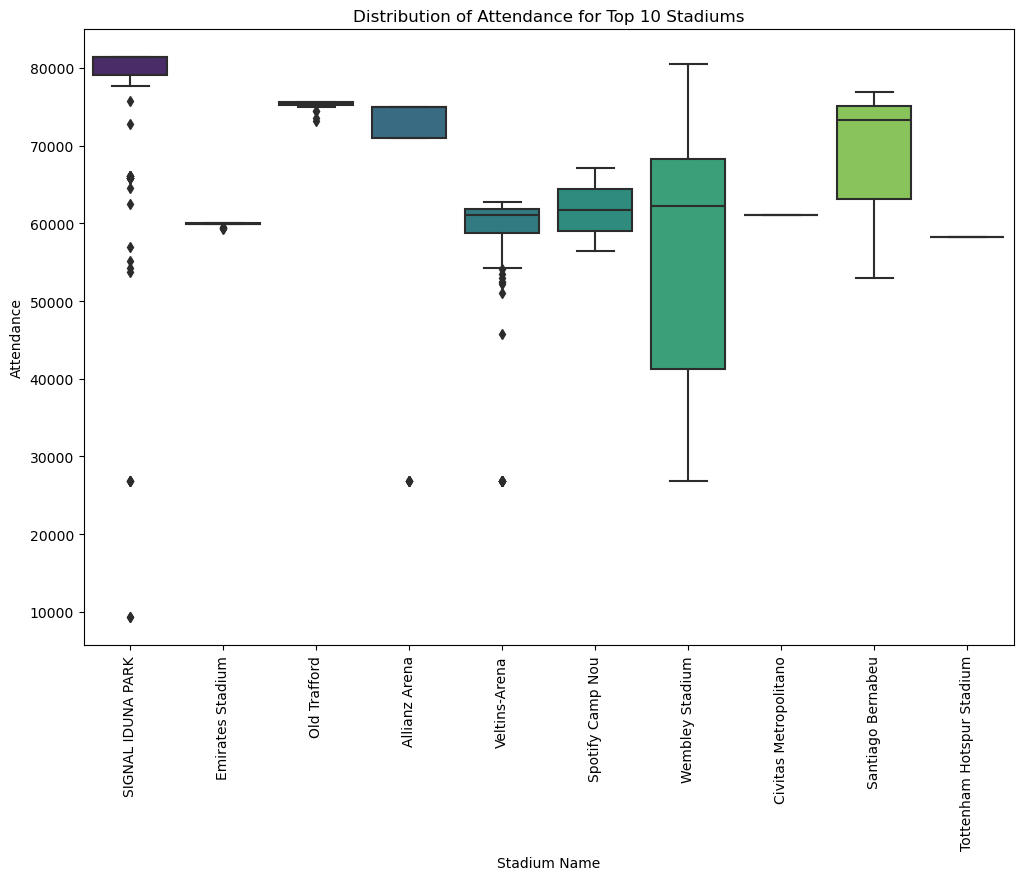

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Stadium_name', y='attendance', data=top_10_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Distribution of Attendance for Top 10 Stadiums')
plt.xlabel('Stadium Name')
plt.ylabel('Attendance')
plt.show()

Interpretation: The boxplot analysis highlights that Signal Iduna Park has the most outliers, indicating more frequent instances of significantly lower attendance for certain football events, despite generally having the highest median attendance among the top 10 stadiums. In contrast, stadiums like Wembley Stadium and Veltins-Arena also show several outliers, though to a lesser extent. Old Trafford and Santiago Bernabeu have very few outliers, suggesting consistent high attendance with less fluctuations. This consistency suggests these stadiums regularly attract almost the full capacity crowds, unlike the more variable attendance seen at Signal Iduna Park and Wembley Stadium.

# Business Question 1:

How do attendance patterns and fluctuations at top stadiums impact event consistency and potential revenue?

- Stadiums like Old Trafford and Santiago Bernabeu have steady, high attendance with little variation, helping them maximize revenue. On the other hand, Signal Iduna Park, though it has high attendance overall, shows more ups and downs, which could lead to less consistent revenue. Reducing these fluctuations, especially at big stadiums like Signal Iduna Park and Wembley Stadium, could help improve revenue stability.

# Objective 2:

Evaluate the Relationship Between Team Performance and Attendance:

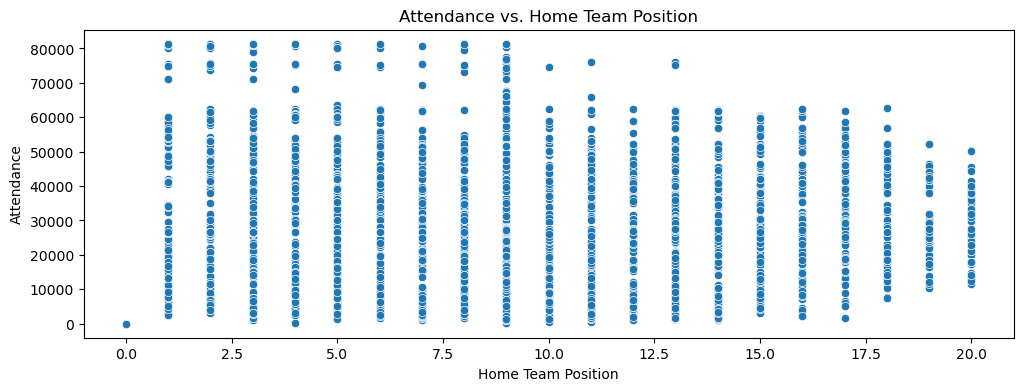

In [32]:
# Scatter plot of attendance vs. home team position
plt.figure(figsize=(12, 4))
sns.scatterplot(x='home_club_position', y='attendance', data=df)
plt.title('Attendance vs. Home Team Position')
plt.xlabel('Home Team Position')
plt.ylabel('Attendance')
plt.show()

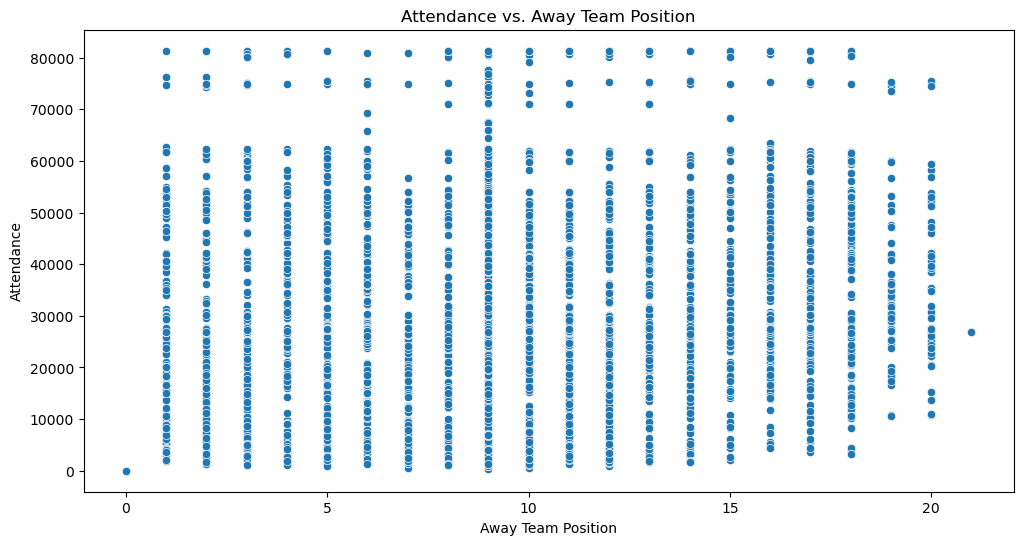

In [33]:
# Scatter plot of attendance vs. away team position
plt.figure(figsize=(12, 6))
sns.scatterplot(x='away_club_position', y='attendance', data=df)
plt.title('Attendance vs. Away Team Position')
plt.xlabel('Away Team Position')
plt.ylabel('Attendance')
plt.show()

Interpretation: The two scatterplot above indicates that attendance is higher when the home/away team has a lower position number. This suggests that matches involving higher-ranked teams tend to attract larger crowds. Conversely, for teams that are ranked closer to 20th position, attendance tends to be lower, often around 10000-50000 for home teams and 25,000 to 30,000 for away teams. However, there is still considerable variation, with some high attendances even for lower-ranked teams.

# Business Question 2:

How does a team's ranking impact match attendance, and what can teams do to attract larger crowds regardless of their position?
- Higher-ranked teams attract larger crowds, with lower-ranked teams seeing less attendance, especially when playing away. However, there are exceptions where even lower-ranked teams draw big crowds. To boost attendance, lower-ranked teams could focus on enhancing fan engagement and offering special promotions to attract more spectators, regardless of their ranking.

# Focus Area 5:

# Referee Analysis

# Objective 1:

 Assess the Impact of Referees on Match Outcomes

In [34]:
df.head()

,game_id,season,round,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,Stadium_name,...,contract_expiration_date,agent_name,competition_id,date_id,players_id,Player_name,players_position,age,contract_years_left,value_change
0,2222734,2012,19. Matchday,2,3,11,10,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,...,2027-06-30,Prosport,RU1,2012-07-12,104203,Eugene Starikov,Attack,36,2.847365,-500000
1,2598832,2015,9. Matchday,0,0,11,5,Oleksandr Babych,Vasyl Sachko,Stadion Chornomorets (2011),...,2027-06-30,Prosport,UKR1,2012-03-11,104203,Eugene Starikov,Attack,36,2.847365,-500000
2,2222798,2012,24. Matchday,1,1,4,11,Kurban Berdyev,Miodrag Bozovic,Central Stadium Kazan,...,2027-06-30,Prosport,RU1,2012-03-11,104203,Eugene Starikov,Attack,36,2.847365,-500000
3,2619433,2015,last 16 1st leg,0,1,9,9,Oleksandr Babych,Vasyl Sachko,Stadion Chornomorets (2011),...,2027-06-30,Prosport,UKRP,2012-03-11,104203,Eugene Starikov,Attack,36,2.847365,-500000
4,2598841,2015,10. Matchday,2,0,2,11,Mircea Lucescu,Oleksandr Babych,Arena Lviv,...,2027-06-30,Prosport,UKR1,2015-03-10,104203,Eugene Starikov,Attack,36,2.847365,-500000


In [35]:
df['referee'].replace("Not_Available", np.nan, inplace=True)


In [36]:
df['referee'] = df['referee'].fillna(df['referee'].mode()[0])


In [37]:
df['match_result'] = df.apply(lambda row: 'Home Win' if row['home_club_goals'] > row['away_club_goals']
                                            else 'Away Win' if row['home_club_goals'] < row['away_club_goals']
                                            else 'Draw', axis=1)

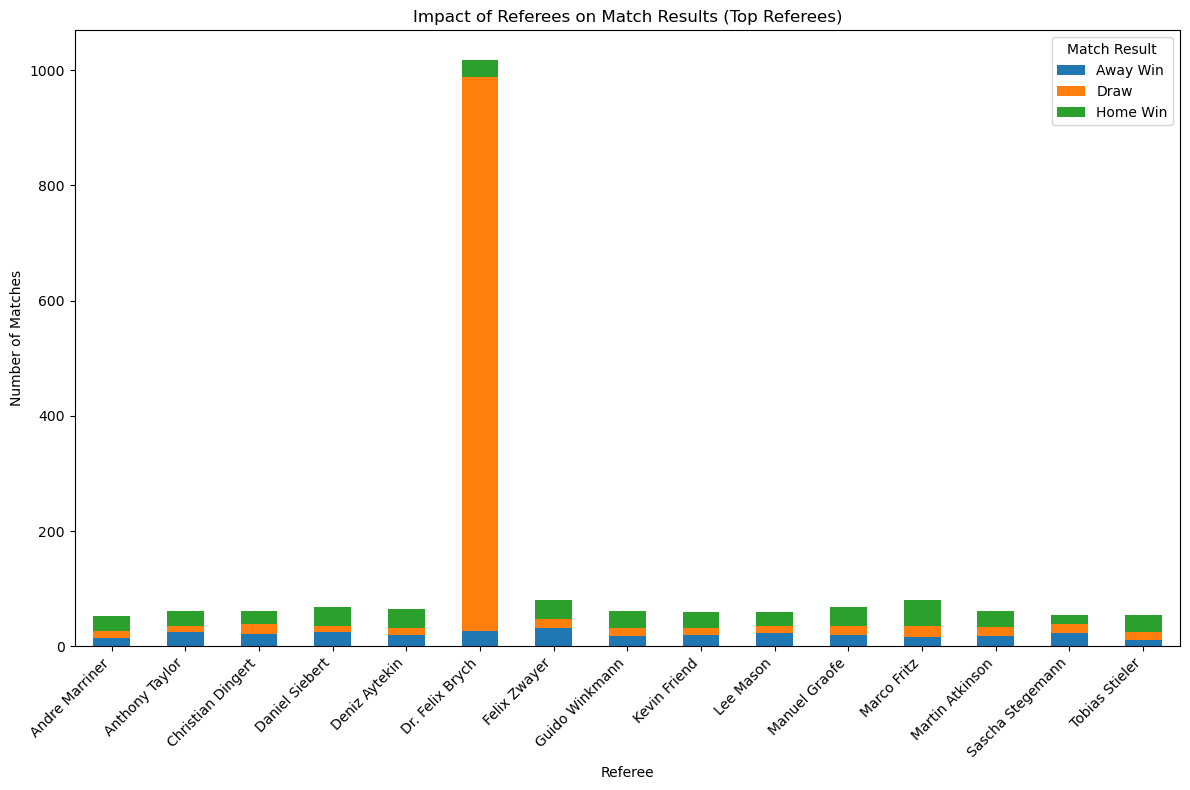

In [38]:
match_threshold = 50 

referee_match_count = df['referee'].value_counts()
top_referees = referee_match_count[referee_match_count > match_threshold].index

df_top_referees = df[df['referee'].isin(top_referees)]

referee_results_top = df_top_referees.groupby(['referee', 'match_result']).size().unstack(fill_value=0)

referee_results_top.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Impact of Referees on Match Results (Top Referees)')
plt.xlabel('Referee')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Match Result')
plt.tight_layout()
plt.show()


Interpretation: Through this chart, it is visible that Dr. Felix Brych has the most number of matches officiated which mostly ended in a draw. Other referees, such as Felix Zwayer, Anthony Taylor, and Martin Atkinson, have officiated far fewer matches, with a relatively balanced distribution of outcomes between home wins, away wins, and draws.

# Objective 2:

Analyze the disciplinary trends of referees by identifying those who issue the highest number of yellow and red cards.

In [39]:
referee_cards = df.groupby('referee').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'Player_name': 'count'
}).reset_index()



In [40]:
referee_cards['avg_yellow_cards_per_match'] = referee_cards['yellow_cards'] / referee_cards['Player_name']
referee_cards['avg_red_cards_per_match'] = referee_cards['red_cards'] / referee_cards['Player_name']

strict_referees = referee_cards.sort_values(by=['avg_yellow_cards_per_match', 'avg_red_cards_per_match'], ascending=False)



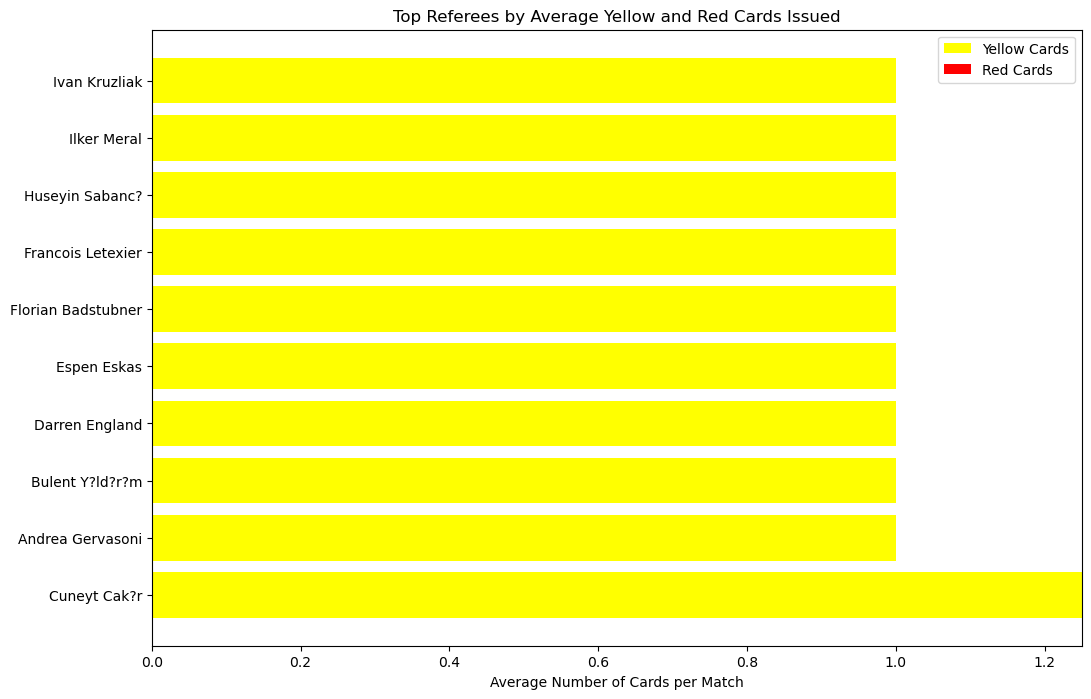

In [41]:
top_referees = strict_referees.head(10) 

plt.figure(figsize=(12, 8))
plt.barh(top_referees['referee'], top_referees['avg_yellow_cards_per_match'], color='yellow', label='Yellow Cards')
plt.barh(top_referees['referee'], top_referees['avg_red_cards_per_match'], left=top_referees['avg_yellow_cards_per_match'], color='red', label='Red Cards')
plt.xlabel('Average Number of Cards per Match')
plt.title('Top Referees by Average Yellow and Red Cards Issued')
plt.legend()
plt.show()

Interpretation: The chart suggests that while most referees have a relatively similar average number of yellow cards given per match, Cuneyt Cakr tends to issue significantly more yellow cards.This indicates that Cuneyt Cakr is a stricter referee in terms of disciplinary actions, as indicated by his significantly higher average number of yellow cards per match compared to other referees.

# Business Question:

How do refereeing styles, particularly in match outcomes and disciplinary actions, impact game dynamics and team performance?
- Referees like Dr. Felix Brych, who officiates many matches that end in draws, and Cuneyt Cakr, who issues more yellow cards, can influence game dynamics. Stricter refereeing may result in more cautious play, affecting outcomes. Teams could adjust their strategies based on the tendencies of the referee to improve their chances of success.